<a href="https://colab.research.google.com/github/VigneshN638/Curneu-Assessment/blob/main/problem_statement_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('classic')
import seaborn as sns

In [ ]:
df_country = pd.read_csv(r'country-wise-average.csv')
df_mal = pd.read_csv(r'malnutrition-estimates.csv')

In [ ]:
df_country.head()

,Country,Income Classification,Severe Wasting,Wasting,Overweight,Stunting,Underweight,U5 Population ('000s)
0,AFGHANISTAN,0.0,3.033333,10.350000,5.125000,47.775000,30.375000,4918.561500
1,ALBANIA,2.0,4.075000,7.760000,20.800000,24.160000,7.700000,232.859800
2,ALGERIA,2.0,2.733333,5.942857,12.833333,19.571429,7.342857,3565.213143
3,ANGOLA,1.0,2.400000,6.933333,2.550000,42.633333,23.600000,3980.054000
4,ARGENTINA,2.0,0.200000,2.150000,11.125000,10.025000,2.600000,3613.651750


In [ ]:
df_mal.head()

,Unnamed: 0,ISO code,Country,Survey Year,Year,Income Classification,LDC,LIFD,LLDC or SID2,Survey Sample (N),Severe Wasting,Wasting,Overweight,Stunting,Underweight,Notes,Report Author,Source,Short Source,U5 Population ('000s)
0,0,AFG,AFGHANISTAN,1997,1997,0,1.0,1.0,1.0,"4,846",NaN,18.2,6.5,53.2,44.9,Converted estimates,CIET International,Afghanistan 1997 multiple indicator baseline (...,MICS,3838.877
1,1,AFG,AFGHANISTAN,2004,2004,0,1.0,1.0,1.0,946,3.5,8.6,4.6,59.3,32.9,NaN,"Ministry of Public Health (Afghanistan), UNICE...",Summary report of the national nutrition surve...,NNS,4789.353
2,2,AFG,AFGHANISTAN,2013,2013,0,1.0,1.0,1.0,"44,26,469",4.0,9.5,5.3,40.4,24.6,NaN,"Ministry of Public Health, UNICEF and the Aga ...",Afghanistan National Nutrition Survey 2013.,SMART,5444.573
3,3,AFG,AFGHANISTAN,2018,2018,0,1.0,1.0,1.0,NaN,1.6,5.1,4.1,38.2,19.1,NaN,KIT Royal Tropical Institute,Afghanistan Health Survey 2018,Other,5601.443
4,4,ALB,ALBANIA,1996-98,1997,2,0.0,0.0,0.0,"7,642",NaN,8.1,9.5,20.4,7.1,Converted estimates,"Institute of Public Health, Food and Nutrition...",National study on nutrition in Albania. Instit...,Other,309.225


In [ ]:
df_country.columns

Index(['Country', 'Income Classification', 'Severe Wasting', 'Wasting',
       'Overweight', 'Stunting', 'Underweight', 'U5 Population ('000s)'],
      dtype='object')

In [ ]:
df_mal.columns

Index(['Unnamed: 0', 'ISO code', 'Country', 'Survey Year', 'Year',
       'Income Classification', 'LDC', 'LIFD', 'LLDC or SID2',
       'Survey Sample (N)', 'Severe Wasting', 'Wasting', 'Overweight',
       'Stunting', 'Underweight', 'Notes', 'Report Author', 'Source',
       'Short Source', 'U5 Population ('000s)'],
      dtype='object')

In [ ]:
df_mal = df_mal.iloc[:,1:]
df_mal.head()

,ISO code,Country,Survey Year,Year,Income Classification,LDC,LIFD,LLDC or SID2,Survey Sample (N),Severe Wasting,Wasting,Overweight,Stunting,Underweight,Notes,Report Author,Source,Short Source,U5 Population ('000s)
0,AFG,AFGHANISTAN,1997,1997,0,1.0,1.0,1.0,"4,846",NaN,18.2,6.5,53.2,44.9,Converted estimates,CIET International,Afghanistan 1997 multiple indicator baseline (...,MICS,3838.877
1,AFG,AFGHANISTAN,2004,2004,0,1.0,1.0,1.0,946,3.5,8.6,4.6,59.3,32.9,NaN,"Ministry of Public Health (Afghanistan), UNICE...",Summary report of the national nutrition surve...,NNS,4789.353
2,AFG,AFGHANISTAN,2013,2013,0,1.0,1.0,1.0,"44,26,469",4.0,9.5,5.3,40.4,24.6,NaN,"Ministry of Public Health, UNICEF and the Aga ...",Afghanistan National Nutrition Survey 2013.,SMART,5444.573
3,AFG,AFGHANISTAN,2018,2018,0,1.0,1.0,1.0,NaN,1.6,5.1,4.1,38.2,19.1,NaN,KIT Royal Tropical Institute,Afghanistan Health Survey 2018,Other,5601.443
4,ALB,ALBANIA,1996-98,1997,2,0.0,0.0,0.0,"7,642",NaN,8.1,9.5,20.4,7.1,Converted estimates,"Institute of Public Health, Food and Nutrition...",National study on nutrition in Albania. Instit...,Other,309.225


In [ ]:
df_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                152 non-null    object 
 1   Income Classification  152 non-null    float64
 2   Severe Wasting         140 non-null    float64
 3   Wasting                150 non-null    float64
 4   Overweight             149 non-null    float64
 5   Stunting               151 non-null    float64
 6   Underweight            150 non-null    float64
 7   U5 Population ('000s)  152 non-null    float64
dtypes: float64(7), object(1)
memory usage: 9.6+ KB


In [ ]:
df_mal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ISO code               924 non-null    object 
 1   Country                924 non-null    object 
 2   Survey Year            924 non-null    object 
 3   Year                   924 non-null    int64  
 4   Income Classification  924 non-null    int64  
 5   LDC                    924 non-null    float64
 6   LIFD                   924 non-null    float64
 7   LLDC or SID2           924 non-null    float64
 8   Survey Sample (N)      861 non-null    object 
 9   Severe Wasting         696 non-null    float64
 10  Wasting                877 non-null    float64
 11  Overweight             788 non-null    float64
 12  Stunting               887 non-null    float64
 13  Underweight            902 non-null    float64
 14  Notes                  327 non-null    object 
 15  Report

In [ ]:
#mean,median,mode functions for EDA
def find_mean(df,x):
    s = 0
    for i in df:
        s+=i
    print("MEAN of %s : %.3f"%(x,(s/len(df))))
    
def find_stdev(df,x):
    s = 0
    for i in df:
        s+=i
    m = s/len(df)
    total = 0
    for i in df:
        total = total+((i-m)**2)
    res = (total/len(df))**(1/2)
    print("STDEV of %s : %.3f"%(x,res))
    
def find_median(df,x):
    df1 = df.sort_values(ascending = True)
    mid = (len(df)+1)//2
    print("MEDIAN of %s : %d"%(x,df1[mid]))

def find_mode(df,x):
    dic = {}
    for i in df:
        if i not in dic:
            dic[i] = 1
        else:
            dic[i] += 1
    res = max(dic.values())
    print("MODE of %s : %d"%(x,res))
    
def find_quart(df,x,pos):
    df1 = df.sort_values(ascending = True)
    qar = pos*((len(df)+1)//4)
    print("QUARTILE of %s : %d"%(x,df1[qar]))

In [ ]:
#filling missing values in country averages(df_country)
for i in df_country.columns:
    if type(df_country[i][0]) == np.float64:
        df_country[i]=df_country[i].fillna(df_country[i].mean())

In [ ]:
df_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                152 non-null    object 
 1   Income Classification  152 non-null    float64
 2   Severe Wasting         152 non-null    float64
 3   Wasting                152 non-null    float64
 4   Overweight             152 non-null    float64
 5   Stunting               152 non-null    float64
 6   Underweight            152 non-null    float64
 7   U5 Population ('000s)  152 non-null    float64
dtypes: float64(7), object(1)
memory usage: 9.6+ KB


In [ ]:
#filling missing values in malnutrition (df_mal)
df_mal = df_mal.fillna(df_mal.mean())

In [ ]:
#finding mean for all possible rows(int and float) on country_average
for i in df_country.columns:
    if type(df_country[i][0]) == np.float64:
        find_mean(df_country[i],i)

MEAN of Income Classification : 1.428
MEAN of Severe Wasting : 2.169
MEAN of Wasting : 6.599
MEAN of Overweight : 7.202
MEAN of Stunting : 25.815
MEAN of Underweight : 13.503
MEAN of U5 Population ('000s) : 4042.927


In [ ]:
#finding mean for all possible rows(int and float) in malnutrition
for i in df_mal.columns:
    if (type(df_mal[i][1]) == np.float64) or (type(df_mal[i][1]) == np.int64):
        find_mean(df_mal[i],i)

MEAN of Year : 2003.731
MEAN of Income Classification : 1.240
MEAN of LDC : 0.350
MEAN of LIFD : 0.424
MEAN of LLDC or SID2 : 0.456
MEAN of Severe Wasting : 2.192
MEAN of Wasting : 6.956
MEAN of Overweight : 6.435
MEAN of Stunting : 29.063
MEAN of Underweight : 15.841
MEAN of U5 Population ('000s) : 6182.705


In [ ]:
#finding median for all possible rows(int and float) on country_average
for i in df_country.columns:
    if type(df_country[i][0]) == np.float64:
        find_median(df_country[i],i)

MEDIAN of Income Classification : 0
MEDIAN of Severe Wasting : 1
MEDIAN of Wasting : 5
MEDIAN of Overweight : 3
MEDIAN of Stunting : 37
MEDIAN of Underweight : 17
MEDIAN of U5 Population ('000s) : 618


In [ ]:
#finding median for all possible rows(int and float) in malnutrition
for i in df_mal.columns:
    if (type(df_mal[i][1]) == np.float64) or (type(df_mal[i][1]) == np.int64):
        find_median(df_mal[i],i)

MEDIAN of Year : 2016
MEDIAN of Income Classification : 0
MEDIAN of LDC : 1
MEDIAN of LIFD : 1
MEDIAN of LLDC or SID2 : 0
MEDIAN of Severe Wasting : 0
MEDIAN of Wasting : 4
MEDIAN of Overweight : 2
MEDIAN of Stunting : 30
MEDIAN of Underweight : 13
MEDIAN of U5 Population ('000s) : 702


In [ ]:
#finding mean for all possible rows(int and float) on country_average
for i in df_country.columns:
    if type(df_country[i][0]) == np.float64:
        find_mode(df_country[i],i)

MODE of Income Classification : 54
MODE of Severe Wasting : 12
MODE of Wasting : 3
MODE of Overweight : 3
MODE of Stunting : 2
MODE of Underweight : 2
MODE of U5 Population ('000s) : 3


In [ ]:
#finding mode for all possible rows(int and float) in malnutrition
for i in df_mal.columns:
    if (type(df_mal[i][1]) == np.float64) or (type(df_mal[i][1]) == np.int64):
        find_mode(df_mal[i],i)

MODE of Year : 59
MODE of Income Classification : 335
MODE of LDC : 601
MODE of LIFD : 532
MODE of LLDC or SID2 : 606
MODE of Severe Wasting : 228
MODE of Wasting : 47
MODE of Overweight : 136
MODE of Stunting : 37
MODE of Underweight : 22
MODE of U5 Population ('000s) : 3


In [ ]:
#finding standard deviation for all possible rows(int and float) on country_average
for i in df_country.columns:
    if type(df_country[i][0]) == np.float64:
        find_stdev(df_country[i],i)

STDEV of Income Classification : 0.964
STDEV of Severe Wasting : 1.634
STDEV of Wasting : 4.437
STDEV of Overweight : 4.588
STDEV of Stunting : 14.590
STDEV of Underweight : 10.788
STDEV of U5 Population ('000s) : 13120.817


In [ ]:
#finding standard deviation for all possible rows(int and float) in malnutrition
for i in df_mal.columns:
    if (type(df_mal[i][1]) == np.float64) or (type(df_mal[i][1]) == np.int64):
        find_stdev(df_mal[i],i)

STDEV of Year : 8.788
STDEV of Income Classification : 0.922
STDEV of LDC : 0.477
STDEV of LIFD : 0.494
STDEV of LLDC or SID2 : 0.686
STDEV of Severe Wasting : 1.659
STDEV of Wasting : 4.907
STDEV of Overweight : 4.281
STDEV of Stunting : 15.506
STDEV of Underweight : 12.353
STDEV of U5 Population ('000s) : 16786.847


In [ ]:
#finding 1st quartile(75%) for all possible rows(int and float) on country_average
for i in df_country.columns:
    if type(df_country[i][0]) == np.float64:
        find_quart(df_country[i],i,1)

QUARTILE of Income Classification : 0
QUARTILE of Severe Wasting : 1
QUARTILE of Wasting : 8
QUARTILE of Overweight : 1
QUARTILE of Stunting : 40
QUARTILE of Underweight : 23
QUARTILE of U5 Population ('000s) : 1862


In [ ]:
#finding 1st quartile(75%) for all possible rows(int and float) in malnutrition
for i in df_mal.columns:
    if (type(df_mal[i][1]) == np.float64) or (type(df_mal[i][1]) == np.int64):
        find_quart(df_mal[i],i,1)

QUARTILE of Year : 2007
QUARTILE of Income Classification : 2
QUARTILE of LDC : 0
QUARTILE of LIFD : 0
QUARTILE of LLDC or SID2 : 2
QUARTILE of Severe Wasting : 0
QUARTILE of Wasting : 2
QUARTILE of Overweight : 8
QUARTILE of Stunting : 10
QUARTILE of Underweight : 3
QUARTILE of U5 Population ('000s) : 992


In [ ]:
#finding 1st quartile(25%) for all possible rows(int and float) on country_average
for i in df_country.columns:
    if type(df_country[i][0]) == np.float64:
        find_quart(df_country[i],i,3)

QUARTILE of Income Classification : 1
QUARTILE of Severe Wasting : 2
QUARTILE of Wasting : 7
QUARTILE of Overweight : 9
QUARTILE of Stunting : 28
QUARTILE of Underweight : 11
QUARTILE of U5 Population ('000s) : 25


In [ ]:
#finding 1st quartile(25%) for all possible rows(int and float) in malnutrition
for i in df_mal.columns:
    if (type(df_mal[i][1]) == np.float64) or (type(df_mal[i][1]) == np.int64):
        find_quart(df_mal[i],i,3)

QUARTILE of Year : 1996
QUARTILE of Income Classification : 1
QUARTILE of LDC : 1
QUARTILE of LIFD : 1
QUARTILE of LLDC or SID2 : 0
QUARTILE of Severe Wasting : 2
QUARTILE of Wasting : 8
QUARTILE of Overweight : 6
QUARTILE of Stunting : 28
QUARTILE of Underweight : 19
QUARTILE of U5 Population ('000s) : 1553


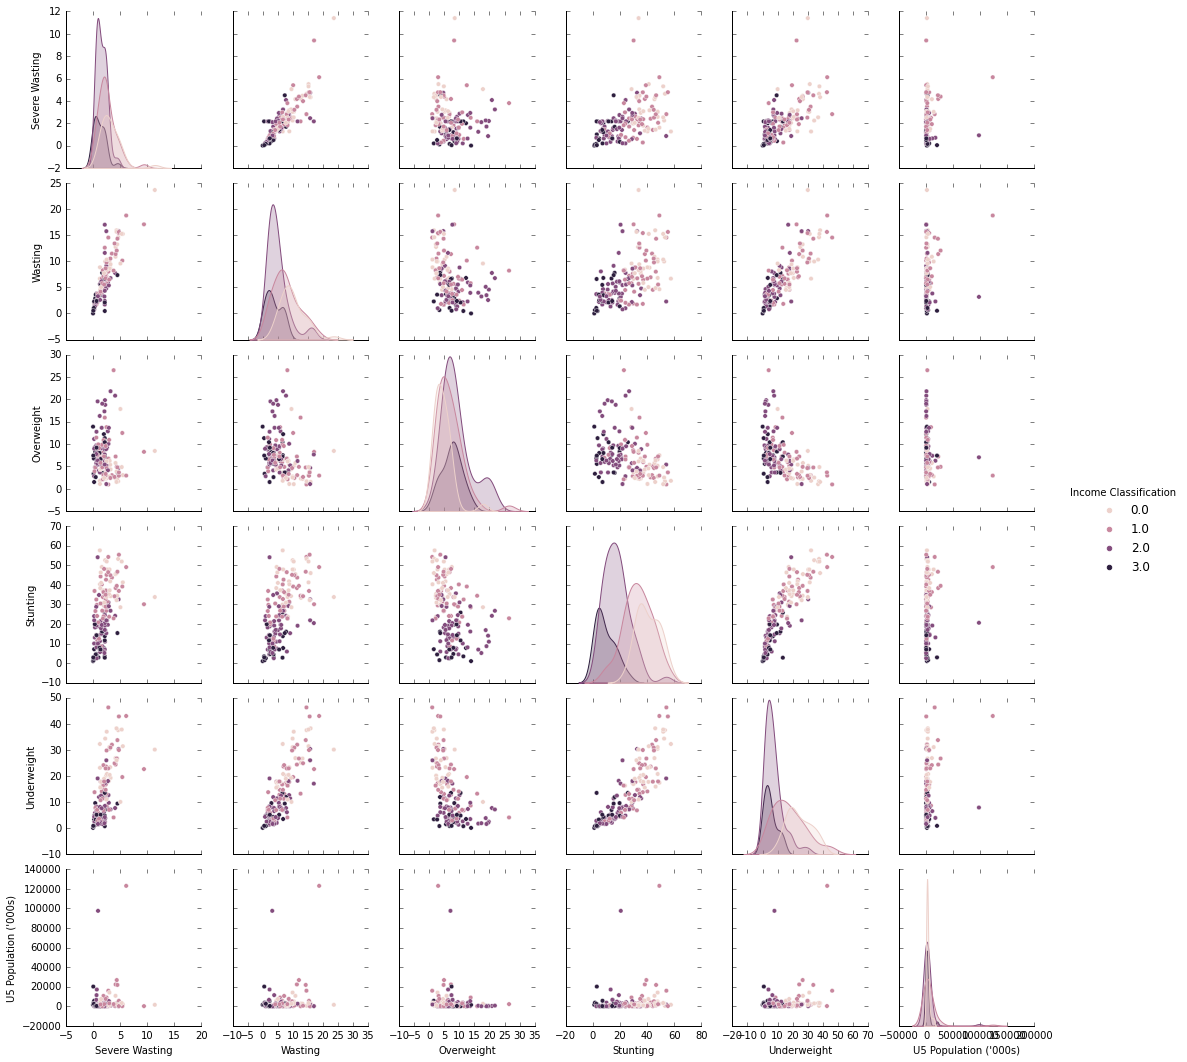

In [ ]:
#pairplot for country Income Classification
sns.pairplot(df_country, hue='Income Classification');

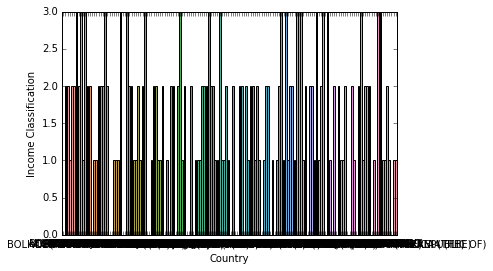

In [ ]:
ax = sns.barplot(x="Country", y="Income Classification", data=df_country)